In [2]:
#Split data according to mode of stimulus before preprocessing or before ml models

import numpy as np
import pandas as pd
import os
import matplotlib.pyplot as plt
import seaborn as sns
import mne

#CNN

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import Normalizer

from sklearn.metrics import accuracy_score, mean_squared_error
from sklearn.metrics import classification_report, confusion_matrix

from sklearn.decomposition import PCA

from keras import activations, initializers, regularizers, constraints
from keras.models import Sequential,load_model
from keras.layers import Dense, Dropout, LSTM, GRU, Embedding, SimpleRNN, Conv2D, Flatten
from tensorflow.keras.layers import InputSpec

import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.optimizers import Adam
####

#SVM

from sklearn import svm
from sklearn.multioutput import MultiOutputClassifier
from sklearn.svm import LinearSVC
from sklearn.metrics import multilabel_confusion_matrix, ConfusionMatrixDisplay
####

#RNN (LSTM for now)
from keras.models import Sequential
from keras import Input 
from keras.layers import Dense, SimpleRNN 
from keras.layers import LSTM, Dense, Dropout, Masking, Embedding
from sklearn.preprocessing import MinMaxScaler 
####

from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

# Reading data

In [3]:
#reading data from CSVs in bulk

speaking1 = pd.read_csv('E:\Diss\Paradigm\Participants\Warren\Labelled\speaking1_labelled.csv')
speaking2 = pd.read_csv('E:\Diss\Paradigm\Participants\Warren\Labelled\speaking2_labelled.csv')
speaking3 = pd.read_csv('E:\Diss\Paradigm\Participants\Warren\Labelled\speaking3_labelled.csv')
speaking4 = pd.read_csv('E:\Diss\Paradigm\Participants\Warren\Labelled\speaking4_labelled.csv')
speaking5 = pd.read_csv('E:\Diss\Paradigm\Participants\Warren\Labelled\speaking5_labelled.csv')
speaking6 = pd.read_csv('E:\Diss\Paradigm\Participants\Warren\Labelled\speaking6_labelled.csv')
speaking7 = pd.read_csv('E:\Diss\Paradigm\Participants\Warren\Labelled\speaking7_labelled.csv')
speaking8 = pd.read_csv('E:\Diss\Paradigm\Participants\Warren\Labelled\speaking8_labelled.csv')
speaking9 = pd.read_csv('E:\Diss\Paradigm\Participants\Warren\Labelled\speaking9_labelled.csv')
speaking10 = pd.read_csv('E:\Diss\Paradigm\Participants\Warren\Labelled\speaking10_labelled.csv')

speaking = pd.concat([speaking1, speaking2, speaking3, speaking4, speaking5, speaking6, speaking7, speaking8, speaking9, speaking10], axis = 0)

In [4]:
speaking

Time:256Hz  Epoch           F3          FC5          AF3           F7  \
0        23.000000      0  4249.487305  4254.743652  4278.461426  4266.282227   
1        23.003906      0  4249.487305  4254.743652  4278.461426  4266.282227   
2        23.007812      0  4249.487305  4254.743652  4278.461426  4266.282227   
3        23.011719      0  4249.487305  4254.743652  4278.461426  4266.282227   
4        23.015625      0  4249.487305  4254.743652  4278.461426  4266.282227   
...            ...    ...          ...          ...          ...          ...   
66555  4503.980469    129  4245.384766  4263.589844  4286.666504  4263.333496   
66556  4503.984375    129  4245.384766  4263.589844  4286.666504  4263.333496   
66557  4503.988281    129  4245.384766  4263.589844  4286.666504  4263.333496   
66558  4503.992188    129  4245.384766  4263.589844  4286.666504  4263.333496   
66559  4503.996094    129  4245.384766  4263.589844  4286.666504  4263.333496   

                T7           P7           O1           O2  ...           T8  \
0      4245.641113  4269.487305  4163.077148  4251.538574  ...  4242.307617   
1      4245.641113  4269.487305  4163.077148  4251.538574  ...  4242.307617   
2      4245.641113  4269.487305  4163.077148  4251.538574  ...  4242.307617   
3      4245.641113  4269.487305  4163.077148  4251.538574  ...  4242.307617   
4      4245.641113  4269.487305  4163.077148  4251.538574  ...  4242.307617   
...            ...          ...          ...          ...  ...          ...   
66555  4245.000000  4248.974121  4206.410156  4261.410156  ...  4249.871582   
66556  4245.000000  4248.974121  4206.410156  4261.410156  ...  4249.871582   
66557  4245.000000  4248.974121  4206.410156  4261.410156  ...  4249.871582   
66558  4245.000000  4248.974121  4206.410156  4261.410156  ...  4249.871582   
66559  4245.000000  4248.974121  4206.410156  4261.410156  ...  4249.871582   

                F8          AF4          FC6           F4   Channel 15  \
0      4261.410156  4247.820312  4252.948730  4236.922852  4248.077148   
1      4261.410156  4247.820312  4252.948730  4236.922852  4248.077148   
2      4261.410156  4247.820312  4252.948730  4236.922852  4248.077148   
3      4261.410156  4247.820312  4252.948730  4236.922852  4248.077148   
4      4261.410156  4247.820312  4252.948730  4236.922852  4248.077148   
...            ...          ...          ...          ...          ...   
66555  4261.538574  4218.589844  4260.128418  4248.461426  4243.717773   
66556  4261.538574  4218.589844  4260.128418  4248.461426  4243.717773   
66557  4261.538574  4218.589844  4260.128418  4248.461426  4243.717773   
66558  4261.538574  4218.589844  4260.128418  4248.461426  4243.717773   
66559  4261.538574  4218.589844  4260.128418  4248.461426  4243.717773   

        Channel 16  Label Mode of Stimulus       Stage  
0      4256.410156   Lamp            audio   speaking1  
1      4256.410156   Lamp            audio   speaking1  
2      4256.410156   Lamp            audio   speaking1  
3      4256.410156   Lamp            audio   speaking1  
4      4256.410156   Lamp            audio   speaking1  
...            ...    ...              ...         ...  
66555  4264.358887  Clock             text  speaking10  
66556  4264.358887  Clock             text  speaking10  
66557  4264.358887  Clock             text  speaking10  
66558  4264.358887  Clock             text  speaking10  
66559  4264.358887  Clock             text  speaking10  

[665600 rows x 21 columns]

# Splitting data

In [6]:
modes_of_stimuli.shape

(1300,)

In [7]:
targets.shape

(1300,)

In [11]:
speaking_audio = speaking[speaking['Mode of Stimulus'] == 'audio']
speaking_text = speaking[speaking['Mode of Stimulus'] == 'text']
speaking_image = speaking[speaking['Mode of Stimulus'] == 'image']

In [32]:
def Handle(dataframe):
    
    features = dataframe.drop(columns = ['Time:256Hz', 'Epoch', 'Stage', 'Channel 16', 'Channel 15', 'Label', 'Mode of Stimulus']).to_numpy().reshape(dataframe.shape[0] // (512), 512 * 14)
    targets = dataframe['Label'].to_numpy().reshape(dataframe.shape[0] // (512), 512)[:, 0]
    modes_of_stimuli = dataframe['Mode of Stimulus'].to_numpy().reshape(dataframe.shape[0] // (512), 512)[:, 0]
    return features, targets, modes_of_stimuli

features, targets, modes_of_stimuli = Handle(speaking_audio)

In [14]:
def split(dataframe):
    
    targets = dataframe['Label'].to_numpy()
    
    return targets

targets_audio = split(speaking_audio)
targets_text = split(speaking_text)
targets_image = split(speaking_image)

In [44]:
speaking_audio_mne = speaking_audio.drop(columns = ['Time:256Hz', 'Epoch', 'Stage', 'Channel 15', 'Channel 16', 'Mode of Stimulus', 'Label', 'Stage'])
speaking_text_mne = speaking_text.drop(columns = ['Time:256Hz', 'Epoch', 'Stage', 'Channel 15', 'Channel 16', 'Mode of Stimulus', 'Label', 'Stage'])
speaking_image_mne = speaking_image.drop(columns = ['Time:256Hz', 'Epoch', 'Stage', 'Channel 15', 'Channel 16', 'Mode of Stimulus', 'Label', 'Stage'])
speaking_audio_mne

F3          FC5          AF3           F7           T7  \
0      4249.487305  4254.743652  4278.461426  4266.282227  4245.641113   
1      4249.487305  4254.743652  4278.461426  4266.282227  4245.641113   
2      4249.487305  4254.743652  4278.461426  4266.282227  4245.641113   
3      4249.487305  4254.743652  4278.461426  4266.282227  4245.641113   
4      4249.487305  4254.743652  4278.461426  4266.282227  4245.641113   
...            ...          ...          ...          ...          ...   
65019  4245.000000  4233.205078  4225.641113  4219.230957  4248.461426   
65020  4245.000000  4233.205078  4225.641113  4219.230957  4248.461426   
65021  4245.000000  4233.205078  4225.641113  4219.230957  4248.461426   
65022  4245.000000  4233.205078  4225.641113  4219.230957  4248.461426   
65023  4245.000000  4233.205078  4225.641113  4219.230957  4248.461426   

                P7           O1           O2           P8           T8  \
0      4269.487305  4163.077148  4251.538574  4250.128418  4242.307617   
1      4269.487305  4163.077148  4251.538574  4250.128418  4242.307617   
2      4269.487305  4163.077148  4251.538574  4250.128418  4242.307617   
3      4269.487305  4163.077148  4251.538574  4250.128418  4242.307617   
4      4269.487305  4163.077148  4251.538574  4250.128418  4242.307617   
...            ...          ...          ...          ...          ...   
65019  4240.384766  4168.974121  4249.487305  4233.846191  4266.538574   
65020  4240.384766  4168.974121  4249.487305  4233.846191  4266.538574   
65021  4240.384766  4168.974121  4249.487305  4233.846191  4266.538574   
65022  4240.384766  4168.974121  4249.487305  4233.846191  4266.538574   
65023  4240.384766  4168.974121  4249.487305  4233.846191  4266.538574   

                F8          AF4          FC6           F4  
0      4261.410156  4247.820312  4252.948730  4236.922852  
1      4261.410156  4247.820312  4252.948730  4236.922852  
2      4261.410156  4247.820312  4252.948730  4236.922852  
3      4261.410156  4247.820312  4252.948730  4236.922852  
4      4261.410156  4247.820312  4252.948730  4236.922852  
...            ...          ...          ...          ...  
65019  4264.871582  4234.615234  4229.871582  4239.743652  
65020  4264.871582  4234.615234  4229.871582  4239.743652  
65021  4264.871582  4234.615234  4229.871582  4239.743652  
65022  4264.871582  4234.615234  4229.871582  4239.743652  
65023  4264.871582  4234.615234  4229.871582  4239.743652  

[204800 rows x 14 columns]

# MNE preprocessing

## Montage using standard 10-20 model

<DigMontage | 0 extras (headshape), 0 HPIs, 3 fiducials, 94 channels>
4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.


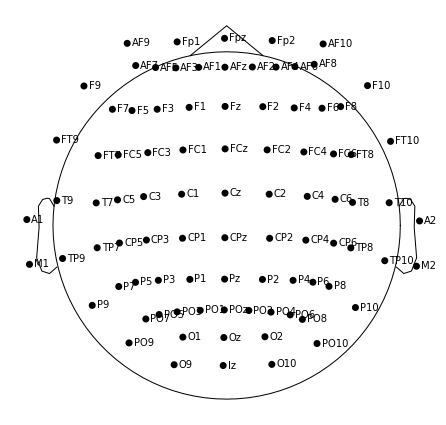

4 duplicate electrode labels found:
T7/T3, T8/T4, P7/T5, P8/T6
Plotting 90 unique labels.


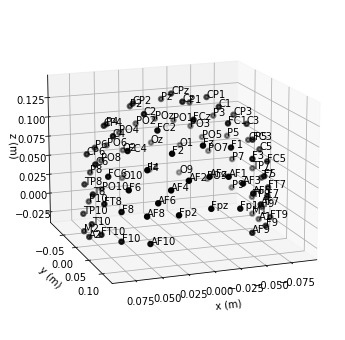

In [104]:
s1020 = mne.channels.make_standard_montage('standard_1020')
print(s1020)

s1020.plot()  # 2D
fig = s1020.plot(kind='3d', show=False)  # 3D
fig = fig.gca().view_init(azim=70, elev=15)  # set view angle for tutorial


{'F3': array([-0.04908182,  0.06114545,  0.04584545]), 'F4': array([0.04908182, 0.06114545, 0.04584545]), 'O1': array([-0.02809091, -0.08646364,  0.        ]), 'O2': array([ 0.02809091, -0.08646364,  0.        ]), 'F7': array([-0.07354545,  0.05343636,  0.        ]), 'F8': array([0.07354545, 0.05343636, 0.        ]), 'T7': array([-0.09090909,  0.        ,  0.        ]), 'T8': array([0.09090909, 0.        , 0.        ]), 'P7': array([-7.35454545e-02, -5.34363636e-02, -9.09090909e-06]), 'P8': array([ 7.35454545e-02, -5.34363636e-02, -9.09090909e-06]), 'FC5': array([-0.07917273,  0.03066364,  0.03226364]), 'FC6': array([0.07917273, 0.03066364, 0.03226364]), 'AF3': array([-0.03636364,  0.08181818,  0.03909091]), 'AF4': array([0.03636364, 0.08181818, 0.03909091])}


C:\Users\ruthwik\AppData\Local\Temp\ipykernel_39216\3125229318.py:10: RuntimeWarning: Fiducial point nasion not found, assuming identity unknown to head transformation
  montage.plot()


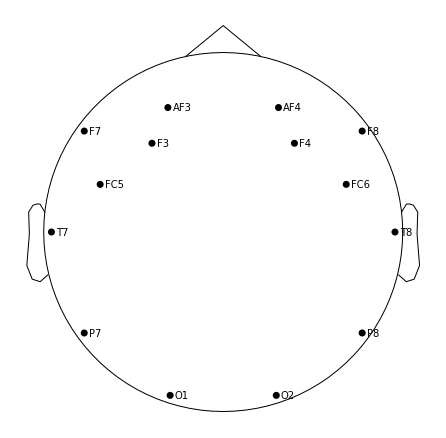

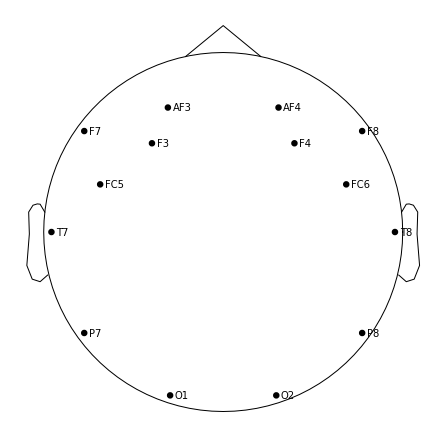

In [105]:
#creating the montage positions (dig = digitization points)

df = pd.read_csv('E:/Diss/Paradigm/14channelsDIG.txt')
ch_names = df.name.to_list()

pos = df[['x','y','z']].values/11 # Scale down to size
dig_ch_pos = dict(zip(ch_names,pos))
print(dig_ch_pos)
montage = mne.channels.make_dig_montage(ch_pos=dig_ch_pos)
montage.plot()

In [106]:
#creating montage from speaking data

sfreq = 256
ch_names = list(speaking_image_mne.columns)
print(ch_names)
info = mne.create_info(ch_names = ch_names, sfreq = sfreq, ch_types = 'eeg')
raw_speaking = mne.io.RawArray(speaking_image_mne[ch_names].transpose(), info)
raw_speaking.set_montage(s1020)
raw_speaking.info

['F3', 'FC5', 'AF3', 'F7', 'T7', 'P7', 'O1', 'O2', 'P8', 'T8', 'F8', 'AF4', 'FC6', 'F4']
Creating RawArray with float64 data, n_channels=14, n_times=204800
    Range : 0 ... 204799 =      0.000 ...   799.996 secs
Ready.


<Info | 8 non-empty values
 bads: []
 ch_names: F3, FC5, AF3, F7, T7, P7, O1, O2, P8, T8, F8, AF4, FC6, F4
 chs: 14 EEG
 custom_ref_applied: False
 dig: 17 items (3 Cardinal, 14 EEG)
 highpass: 0.0 Hz
 lowpass: 128.0 Hz
 meas_date: unspecified
 nchan: 14
 projs: []
 sfreq: 256.0 Hz
>

Effective window size : 8.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


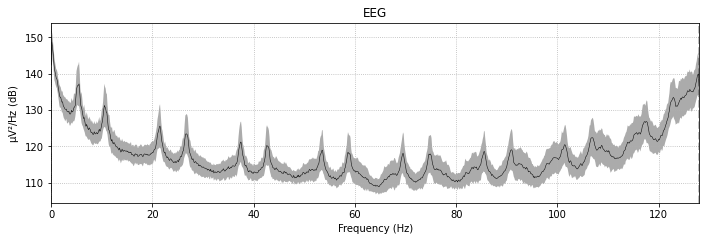

In [107]:
fig = raw_speaking.plot_psd(fmax=128, average=True)

for ax in fig.axes[1:]:
    freqs = ax.lines[-1].get_xdata()
    psds = ax.lines[-1].get_ydata()
    for freq in (60, 120, 240):
        idx = np.searchsorted(freqs, freq)
        ax.arrow(x=freqs[idx], y=psds[idx] + 18, dx=0, dy=-12, color='red',
                 width=0.1, head_width=3, length_includes_head=True)

Effective window size : 8.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


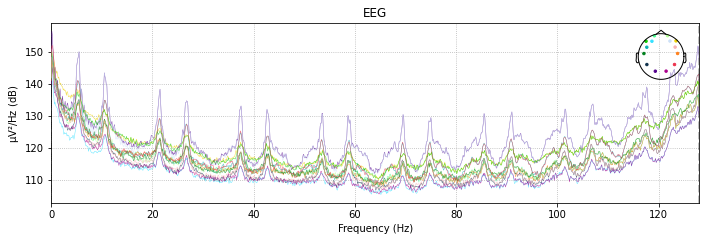

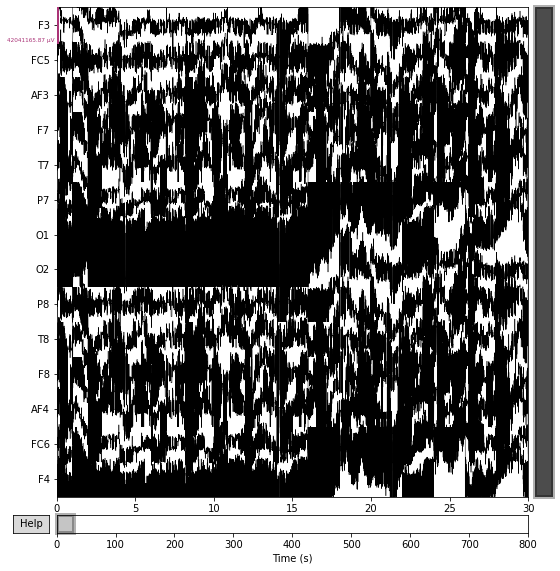

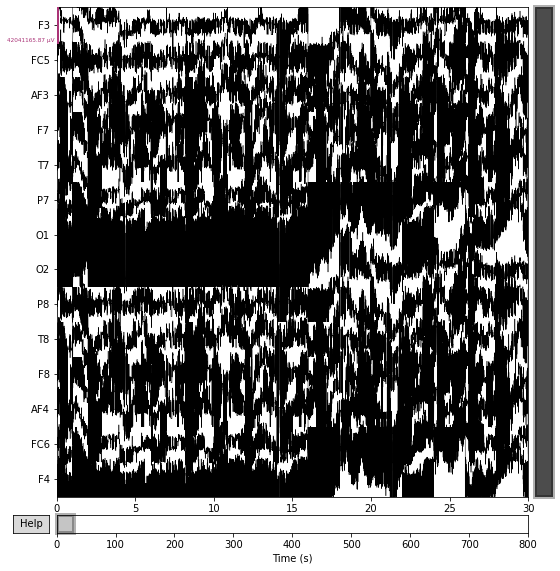

In [108]:
raw_speaking.plot_psd(fmax=128)
raw_speaking.plot(duration=30, n_channels=14, scalings='auto')

In [109]:
#projectors

ssp_projectors = raw_speaking.info['projs']
print(ssp_projectors)
raw_speaking.del_proj()

[]


<RawArray | 14 x 204800 (800.0 s), ~21.9 MB, data loaded>

## Band pass filtering

Effective window size : 8.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


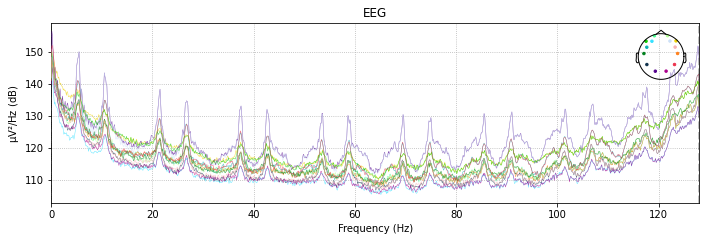

Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 1 - 40 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 1.00
- Lower transition bandwidth: 1.00 Hz (-6 dB cutoff frequency: 0.50 Hz)
- Upper passband edge: 40.00 Hz
- Upper transition bandwidth: 10.00 Hz (-6 dB cutoff frequency: 45.00 Hz)
- Filter length: 845 samples (3.301 sec)

Effective window size : 8.000 (s)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   3 out of   3 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   4 out of   4 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done  14 out of  14 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.0s finished


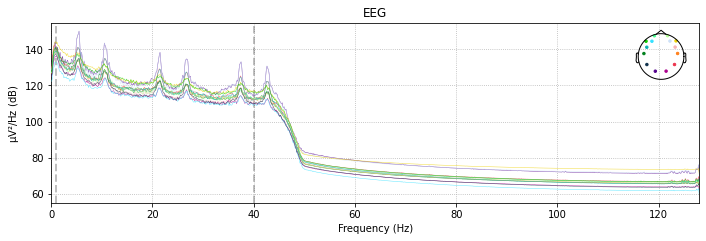

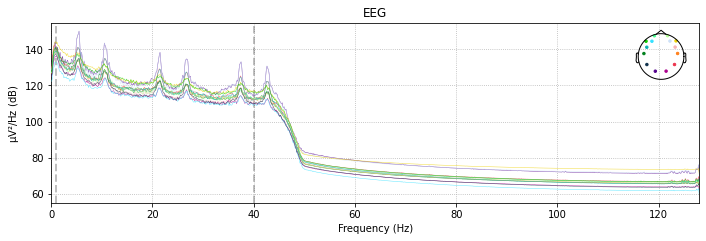

In [110]:
#band pass filtering, required for ICA

raw_speaking.plot_psd(fmax=128)

low_cut = 1
hi_cut  = 40

raw_speaking_filt = raw_speaking.copy().filter(low_cut, hi_cut)
raw_speaking_filt.plot_psd(fmax=128)

## ICA

Fitting ICA to data using 14 channels (please be patient, this may take a while)
Selecting by non-zero PCA components: 14 components
Fitting ICA took 1.3s.
    Using multitaper spectrum estimation with 7 DPSS windows
Not setting metadata
400 matching events found
No baseline correction applied
0 projection items activated
Not setting metadata
400 matching events found
No baseline correction applied
0 projection items activated


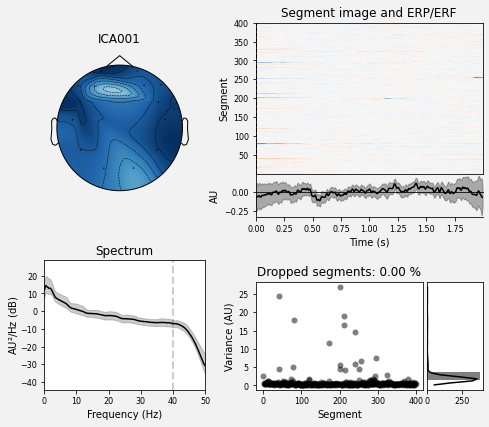

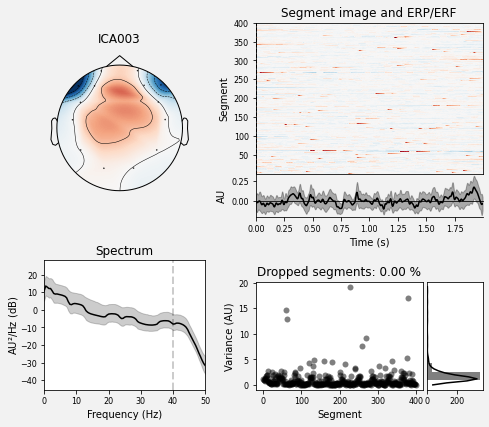

[<Figure size 504x432 with 6 Axes>, <Figure size 504x432 with 6 Axes>]

In [116]:
speaking_processed_mne = raw_speaking_filt.copy()
ica = mne.preprocessing.ICA(max_iter=800)
ica.fit(speaking_processed_mne)
ica.exclude = [1, 3]  # details on how we picked these are omitted here
ica.plot_properties(speaking_processed_mne, picks=ica.exclude)

Creating RawArray with float64 data, n_channels=14, n_times=204800
    Range : 0 ... 204799 =      0.000 ...   799.996 secs
Ready.


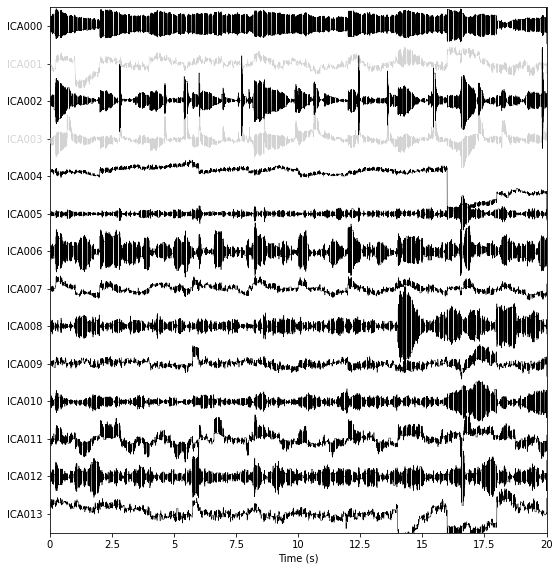

Creating RawArray with float64 data, n_channels=14, n_times=204800
    Range : 0 ... 204799 =      0.000 ...   799.996 secs
Ready.


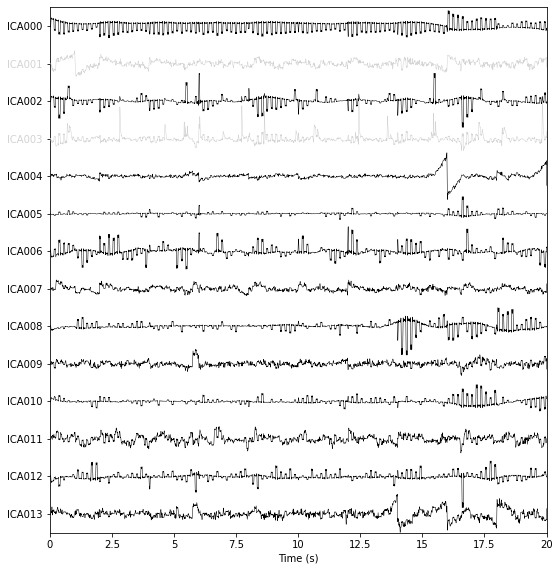

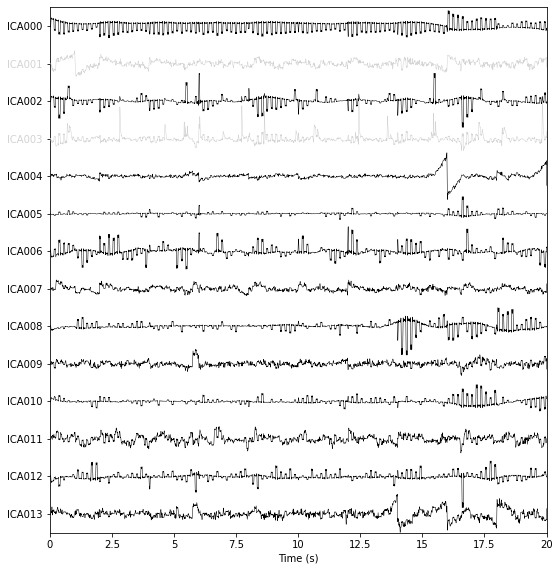

In [117]:
#signal graph (unfiltered and filtered data)

raw_speaking.load_data()
ica.plot_sources(raw_speaking, show_scrollbars=False)
ica.plot_sources(speaking_processed_mne, show_scrollbars=False)

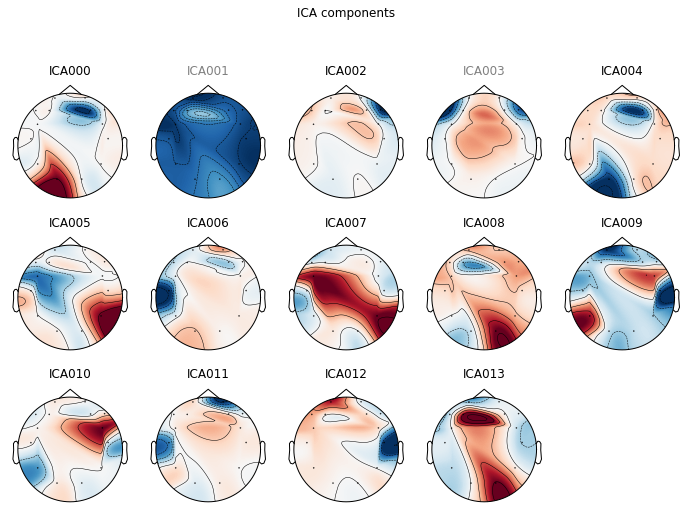

[<MNEFigure size 702x526.68 with 14 Axes>]

In [118]:
ica.plot_components()

Applying ICA to Raw instance
    Transforming to ICA space (14 components)
    Zeroing out 4 ICA components
    Projecting back using 14 PCA components


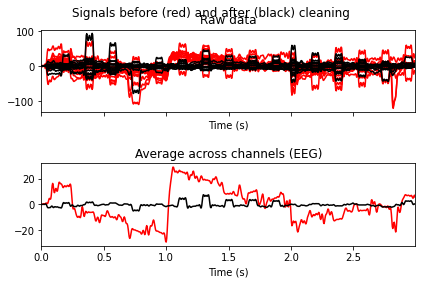

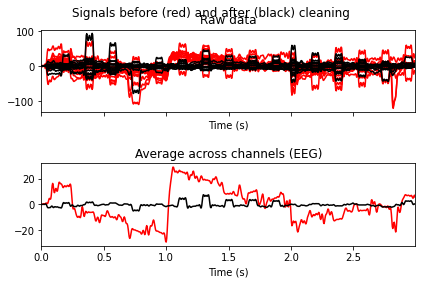

In [119]:
ica.plot_overlay(speaking_processed_mne, exclude=[0, 4])

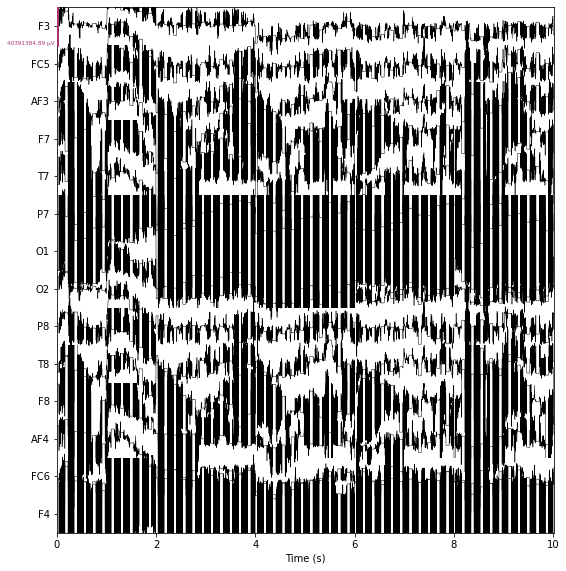

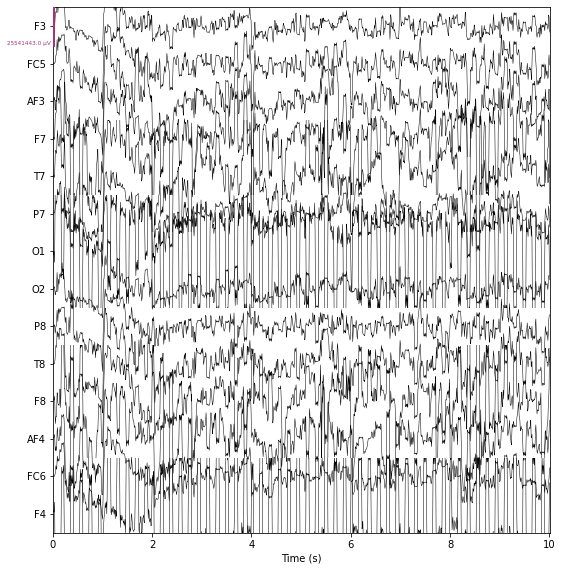

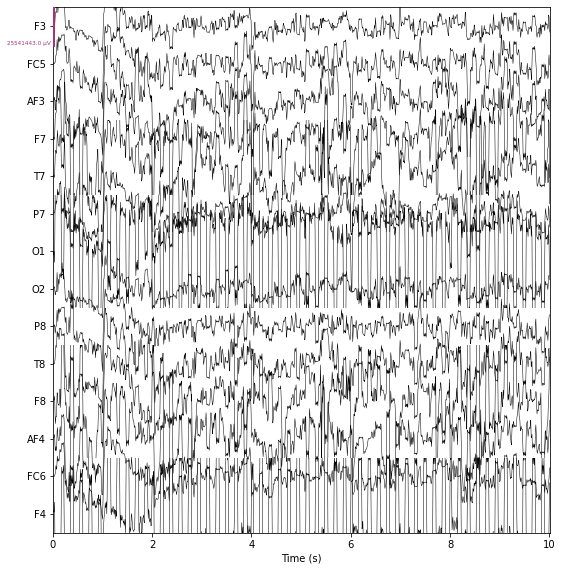

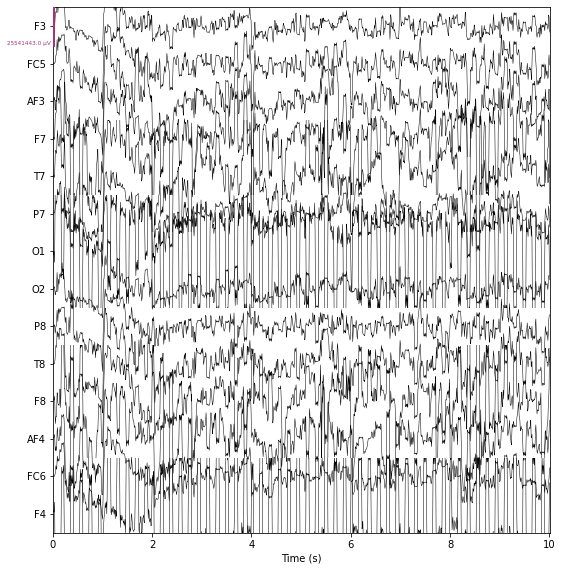

In [120]:
raw_speaking.plot( n_channels=14,
         show_scrollbars=False, scalings='auto')
raw_speaking_filt.plot( n_channels=14,
         show_scrollbars=False, scalings='auto')
speaking_processed_mne.plot(n_channels=14,
                 show_scrollbars=False, scalings='auto')


## Creating events and epochs from filtered data

In [84]:
events_speaking = mne.make_fixed_length_events(speaking_processed_mne, start=0, stop=4504, duration=2)
events_dict = {
               'Text' : 3,
               
               }
events_speaking.shape
# events_speaking[np.array(modes_of_stimuli) == 'audio', 2] = np.array([2 for i in range(400)])
events_speaking[np.array(modes_of_stimuli) == 'text', 2] = np.array([3 for i in range(400)])
# events_speaking[np.array(modes_of_stimuli) == 'None', 2] = np.array([4 for i in range(100)])
events_speaking

ValueError: shape mismatch: value array of shape (400,) could not be broadcast to indexing result of shape (0,)

Not setting metadata
400 matching events found
Applying baseline correction (mode: mean)
0 projection items activated
Using data from preloaded Raw for 400 events and 513 original time points ...
1 bad epochs dropped
Using data from preloaded Raw for 399 events and 513 original time points ...
Using data from preloaded Raw for 10 events and 513 original time points ...


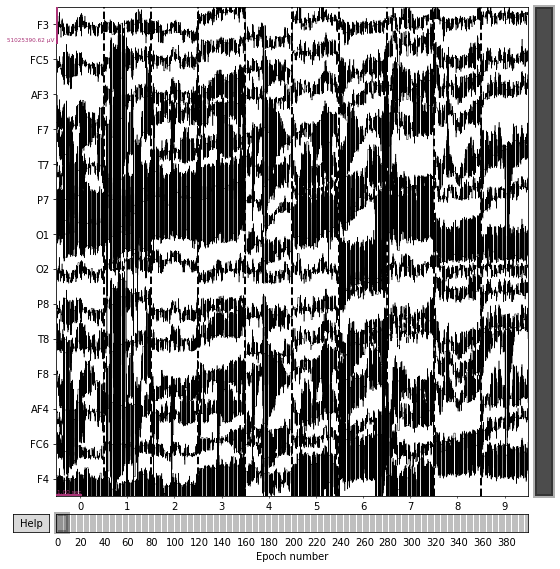

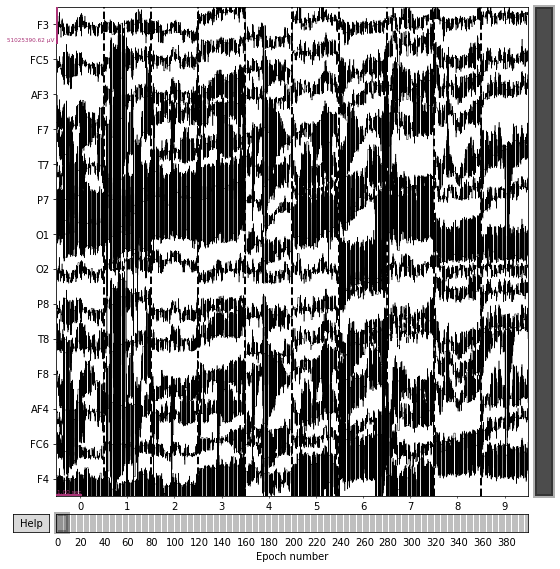

In [37]:
speaking_epoched = mne.Epochs(raw_speaking, tmin=0, tmax = 2, baseline=(0, 0), events = events_speaking, event_id=events_dict)
speaking_epoched.plot(events = events_speaking, n_epochs=10, scalings = 'auto')

## Playing around with epoched data

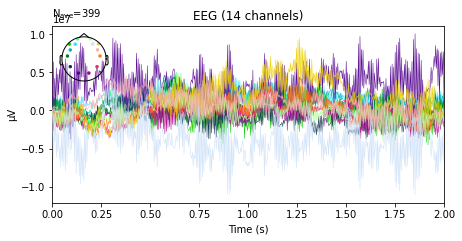

In [38]:
ER_all = speaking_epoched.average()
fig2 = ER_all.plot(spatial_colors=True)

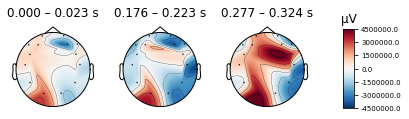

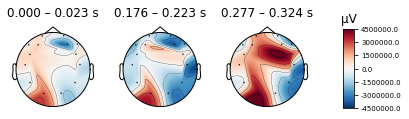

In [39]:
ER_all.plot_topomap(times=[0, 0.2, 0.3], average=0.05)

No projector specified for this dataset. Please consider the method self.add_proj.


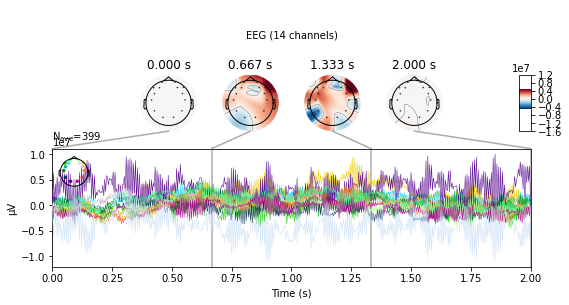

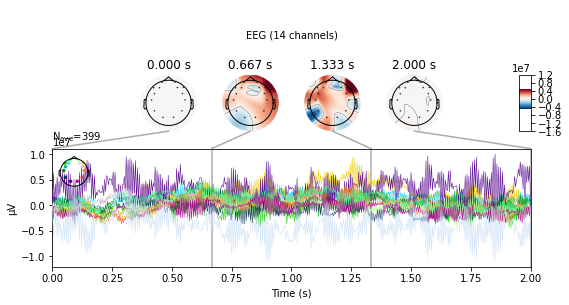

In [40]:
ER_all.plot_joint(times='auto')

In [41]:
average_audio = speaking_epoched['Audio'].average()
average_text = speaking_epoched['Text'].average()
average_visual = speaking_epoched['Visual'].average()

average_audio.plot_joint(times='auto')
average_text.plot_joint(times='auto')
average_visual.plot_joint(times='auto')

KeyError: 'Event name "Text" could not be found. The following events are present in the data: Audio'

## Evoked responses

In [26]:
occipital = ['O1', 'O2']
temporal = ['T7', 'T8']
broca = ['F7']

More than 6 channels, truncating title ...
combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


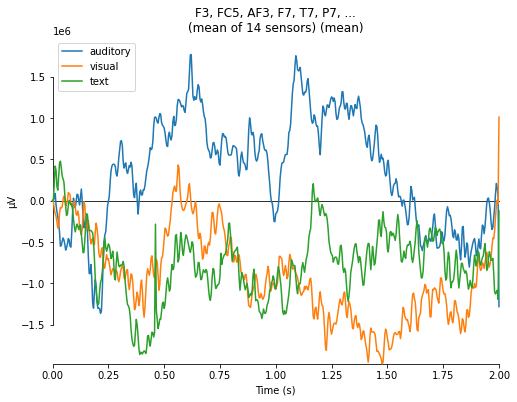

[<Figure size 576x432 with 1 Axes>]

In [27]:
evokeds = dict(auditory=average_audio, visual=average_visual, text=average_text)
picks = [ch_names[n] for n in range(0, 14)]
mne.viz.plot_compare_evokeds(evokeds, picks, combine='mean')

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


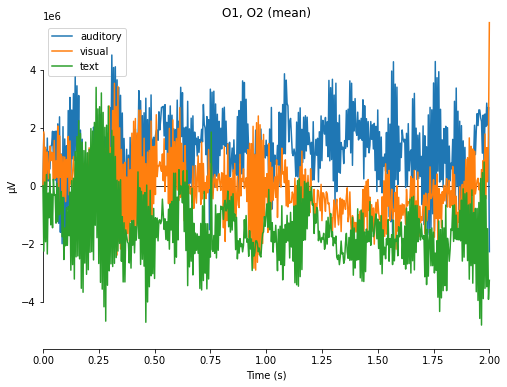

[<Figure size 576x432 with 1 Axes>]

In [28]:
mne.viz.plot_compare_evokeds(evokeds, picks = occipital, combine='mean')

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


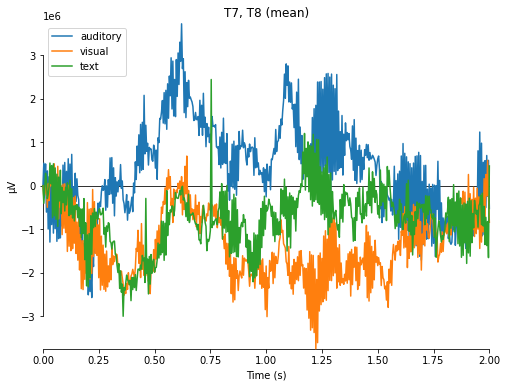

[<Figure size 576x432 with 1 Axes>]

In [29]:
mne.viz.plot_compare_evokeds(evokeds, picks = temporal, combine='mean')

combining channels using "mean"
combining channels using "mean"
combining channels using "mean"


C:\Users\ruthwik\AppData\Local\Temp\ipykernel_45088\2533468638.py:1: RuntimeWarning: Only 1 channel in "picks"; cannot combine by method "mean".
  mne.viz.plot_compare_evokeds(evokeds, picks = broca, combine='mean')


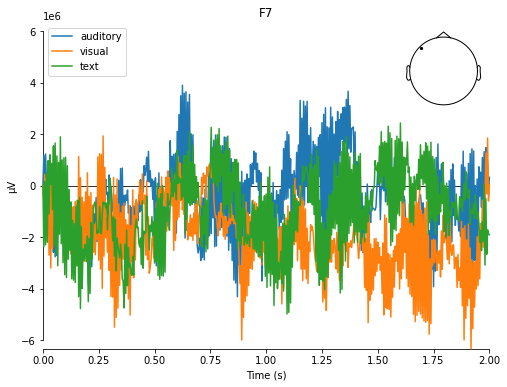

[<Figure size 576x432 with 2 Axes>]

In [30]:
mne.viz.plot_compare_evokeds(evokeds, picks = broca, combine='mean')

# Machine learning models (split into subsections)

## Feature extraction

In [121]:
speaking_processed = speaking_processed_mne.to_data_frame().drop(columns = ['time']).to_numpy().reshape(speaking_audio.shape[0] // (512), 512 * 14)
speaking_processed.shape

(400, 7168)

In [122]:
x_train, x_test, y_train, y_test = train_test_split(speaking_processed, targets)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(300, 7168) (300,) (100, 7168) (100,)


In [123]:
onehot_encoder = OneHotEncoder(sparse=False)
y_train = onehot_encoder.fit_transform(y_train[:, None])
y_train_IE = np.argmax(y_train, axis = 1)
y_test = np.argmax(onehot_encoder.transform(y_test[:, None]), axis = 1)
print(x_train.shape, x_test.shape, y_train.shape, y_train_IE.shape, y_test.shape)

(300, 7168) (100, 7168) (300, 4) (300,) (100,)


In [124]:
pca = PCA(0.999)
x_train_PCA = pca.fit_transform(x_train)
x_test_PCA = pca.transform(x_test)
print(x_train.shape, x_test.shape, x_train_PCA.shape, x_test_PCA.shape)

(300, 7168) (100, 7168) (300, 289) (100, 289)


## DNN trail

In [125]:
epochs = 500
batch_size = 4

DNN_simple = Sequential()
DNN_simple.add(Dense(50, input_dim= x_train_PCA.shape[1]))
DNN_simple.add(Dense(100, input_dim=100))
DNN_simple.add(Dense(100, input_dim=100))
DNN_simple.add(Dropout(0.2))
DNN_simple.add(Dense(100, input_dim=100))
DNN_simple.add(Dense(4, input_dim = 100, activation='sigmoid'))
init_lr = 1e-5
opt = Adam(learning_rate=init_lr, decay=init_lr / epochs)
DNN_simple.compile(loss='categorical_crossentropy', optimizer=opt,  metrics=['accuracy'])
DNN_simple.summary()
simple_DNN_training = DNN_simple.fit(x_train_PCA, y_train, epochs=epochs, batch_size=batch_size)

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_17 (Dense)            (None, 50)                14500     
                                                                 
 dense_18 (Dense)            (None, 100)               5100      
                                                                 
 dense_19 (Dense)            (None, 100)               10100     
                                                                 
 dropout_5 (Dropout)         (None, 100)               0         
                                                                 
 dense_20 (Dense)            (None, 100)               10100     
                                                                 
 dense_21 (Dense)            (None, 4)                 404       
                                                                 
Total params: 40,204
Trainable params: 40,204
Non-trai

75/75 [==============================] - 0s 930us/step - loss: 37322396.0000 - accuracy: 0.4500
Epoch 66/500
75/75 [==============================] - 0s 863us/step - loss: 36201860.0000 - accuracy: 0.4433
Epoch 67/500
75/75 [==============================] - 0s 863us/step - loss: 36590336.0000 - accuracy: 0.4167
Epoch 68/500
75/75 [==============================] - 0s 876us/step - loss: 35781336.0000 - accuracy: 0.4200
Epoch 69/500
75/75 [==============================] - 0s 863us/step - loss: 36173396.0000 - accuracy: 0.4100
Epoch 70/500
75/75 [==============================] - 0s 903us/step - loss: 37193680.0000 - accuracy: 0.4067
Epoch 71/500
75/75 [==============================] - 0s 916us/step - loss: 38807840.0000 - accuracy: 0.4200
Epoch 72/500
75/75 [==============================] - 0s 943us/step - loss: 39116324.0000 - accuracy: 0.3767
Epoch 73/500
75/75 [==============================] - 0s 863us/step - loss: 34585588.0000 - accuracy: 0.4267
Epoch 74/500
75/75 [============

75/75 [==============================] - 0s 930us/step - loss: 22050640.0000 - accuracy: 0.4933
Epoch 141/500
75/75 [==============================] - 0s 876us/step - loss: 23066210.0000 - accuracy: 0.5033
Epoch 142/500
75/75 [==============================] - 0s 863us/step - loss: 21643668.0000 - accuracy: 0.4567
Epoch 143/500
75/75 [==============================] - 0s 876us/step - loss: 21212586.0000 - accuracy: 0.4600
Epoch 144/500
75/75 [==============================] - 0s 863us/step - loss: 18426830.0000 - accuracy: 0.5633
Epoch 145/500
75/75 [==============================] - 0s 876us/step - loss: 19692258.0000 - accuracy: 0.5533
Epoch 146/500
75/75 [==============================] - 0s 903us/step - loss: 20008432.0000 - accuracy: 0.5200
Epoch 147/500
75/75 [==============================] - 0s 876us/step - loss: 19806136.0000 - accuracy: 0.5367
Epoch 148/500
75/75 [==============================] - 0s 876us/step - loss: 17050114.0000 - accuracy: 0.5400
Epoch 149/500
75/75 [===

75/75 [==============================] - 0s 889us/step - loss: 9590999.0000 - accuracy: 0.6733
Epoch 215/500
75/75 [==============================] - 0s 890us/step - loss: 11399417.0000 - accuracy: 0.6300
Epoch 216/500
75/75 [==============================] - 0s 876us/step - loss: 10025271.0000 - accuracy: 0.6133
Epoch 217/500
75/75 [==============================] - 0s 876us/step - loss: 10250219.0000 - accuracy: 0.6600
Epoch 218/500
75/75 [==============================] - 0s 863us/step - loss: 7338139.5000 - accuracy: 0.6600
Epoch 219/500
75/75 [==============================] - 0s 903us/step - loss: 11114743.0000 - accuracy: 0.6200
Epoch 220/500
75/75 [==============================] - 0s 890us/step - loss: 10184919.0000 - accuracy: 0.6200
Epoch 221/500
75/75 [==============================] - 0s 890us/step - loss: 9133883.0000 - accuracy: 0.6467
Epoch 222/500
75/75 [==============================] - 0s 863us/step - loss: 9467240.0000 - accuracy: 0.6600
Epoch 223/500
75/75 [=======

75/75 [==============================] - 0s 876us/step - loss: 3261703.2500 - accuracy: 0.8300
Epoch 290/500
75/75 [==============================] - 0s 876us/step - loss: 3866706.0000 - accuracy: 0.8167
Epoch 291/500
75/75 [==============================] - 0s 903us/step - loss: 3764879.2500 - accuracy: 0.7900
Epoch 292/500
75/75 [==============================] - 0s 889us/step - loss: 3643551.5000 - accuracy: 0.8000
Epoch 293/500
75/75 [==============================] - 0s 890us/step - loss: 4717404.0000 - accuracy: 0.7767
Epoch 294/500
75/75 [==============================] - 0s 876us/step - loss: 3558703.0000 - accuracy: 0.8000
Epoch 295/500
75/75 [==============================] - 0s 903us/step - loss: 3466109.7500 - accuracy: 0.8433
Epoch 296/500
75/75 [==============================] - 0s 876us/step - loss: 3630575.2500 - accuracy: 0.7900
Epoch 297/500
75/75 [==============================] - 0s 890us/step - loss: 3566872.0000 - accuracy: 0.8067
Epoch 298/500
75/75 [============

75/75 [==============================] - 0s 916us/step - loss: 972472.0000 - accuracy: 0.9067
Epoch 365/500
75/75 [==============================] - 0s 876us/step - loss: 1785335.5000 - accuracy: 0.8967
Epoch 366/500
75/75 [==============================] - 0s 916us/step - loss: 1072268.0000 - accuracy: 0.9167
Epoch 367/500
75/75 [==============================] - 0s 876us/step - loss: 1328890.5000 - accuracy: 0.9167
Epoch 368/500
75/75 [==============================] - 0s 890us/step - loss: 832409.3125 - accuracy: 0.9500
Epoch 369/500
75/75 [==============================] - 0s 876us/step - loss: 1856128.8750 - accuracy: 0.8867
Epoch 370/500
75/75 [==============================] - 0s 876us/step - loss: 996423.4375 - accuracy: 0.9100
Epoch 371/500
75/75 [==============================] - 0s 890us/step - loss: 866566.6875 - accuracy: 0.9333
Epoch 372/500
75/75 [==============================] - 0s 890us/step - loss: 1407604.7500 - accuracy: 0.8800
Epoch 373/500
75/75 [================

75/75 [==============================] - 0s 890us/step - loss: 359305.3750 - accuracy: 0.9633
Epoch 440/500
75/75 [==============================] - 0s 876us/step - loss: 385457.6875 - accuracy: 0.9600
Epoch 441/500
75/75 [==============================] - 0s 876us/step - loss: 304468.6250 - accuracy: 0.9700
Epoch 442/500
75/75 [==============================] - 0s 890us/step - loss: 434354.5312 - accuracy: 0.9567
Epoch 443/500
75/75 [==============================] - 0s 876us/step - loss: 703957.1875 - accuracy: 0.9633
Epoch 444/500
75/75 [==============================] - 0s 876us/step - loss: 390423.1562 - accuracy: 0.9567
Epoch 445/500
75/75 [==============================] - 0s 890us/step - loss: 264672.5938 - accuracy: 0.9567
Epoch 446/500
75/75 [==============================] - 0s 890us/step - loss: 231660.2344 - accuracy: 0.9667
Epoch 447/500
75/75 [==============================] - 0s 890us/step - loss: 786895.6875 - accuracy: 0.9633
Epoch 448/500
75/75 [=====================

In [126]:
DNN_simple_pred = np.argmax(DNN_simple.predict(x_test_PCA), axis = 1)
DNN_simple_pred
print(DNN_simple_pred[:, None].shape, y_test.shape)

accuracy_score(y_test, DNN_simple_pred[:, None])

4/4 [==============================] - 0s 997us/step
(100, 1) (100,)


0.25

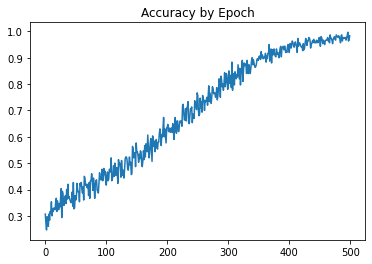

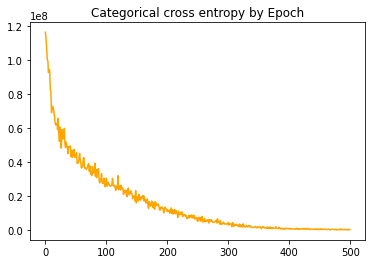

In [127]:
plt.plot(simple_DNN_training.history['accuracy'])
plt.title('Accuracy by Epoch')
plt.show()
plt.plot(simple_DNN_training.history['loss'], color = 'orange')
plt.title('Categorical cross entropy by Epoch')
plt.show()

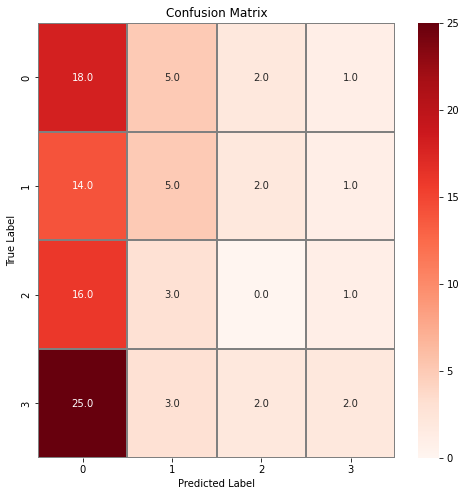

In [128]:
confusion_mtx = confusion_matrix(y_test, DNN_simple_pred[:, None]) 

f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Reds",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## CNN

In [129]:
# # format data for input to the CNN...
X_train_CNN = x_train.reshape(x_train.shape[0], 512, 14, 1)
X_test_CNN = x_test.reshape(x_test.shape[0],512, 14, 1)
# #test_submit_set = np.array(test_submit_set).reshape(test_submit_set.shape[0], 28, 28, 1)

In [130]:
epochs = 100
batch_size = 4

CNN_simple = Sequential()
#add model layers
CNN_simple.add(Conv2D(10, kernel_size=3, activation = 'relu', input_shape=(512, 14, 1)))
CNN_simple.add(Conv2D(20, kernel_size=3, activation = 'relu'))
CNN_simple.add(Conv2D(20, kernel_size=3, activation = 'relu'))
CNN_simple.add(Conv2D(20, kernel_size=3, activation = 'relu'))
CNN_simple.add(Flatten())
CNN_simple.add(Dropout(0.2))
CNN_simple.add(Dense(4, activation= 'softmax'))
init_lr = 1e-4
opt = Adam(learning_rate=init_lr, decay=init_lr / epochs)
CNN_simple.compile(optimizer=opt, loss='binary_crossentropy', metrics=['accuracy'])
CNN_simple.summary()

Model: "sequential_6"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_8 (Conv2D)           (None, 510, 12, 10)       100       
                                                                 
 conv2d_9 (Conv2D)           (None, 508, 10, 20)       1820      
                                                                 
 conv2d_10 (Conv2D)          (None, 506, 8, 20)        3620      
                                                                 
 conv2d_11 (Conv2D)          (None, 504, 6, 20)        3620      
                                                                 
 flatten_2 (Flatten)         (None, 60480)             0         
                                                                 
 dropout_6 (Dropout)         (None, 60480)             0         
                                                                 
 dense_22 (Dense)            (None, 4)                

In [131]:
simple_CNN_training = CNN_simple.fit(X_train_CNN, y_train, epochs=epochs, batch_size=batch_size)

Epoch 1/100
75/75 [==============================] - 2s 16ms/step - loss: 844722.5625 - accuracy: 0.2633
Epoch 2/100
75/75 [==============================] - 1s 18ms/step - loss: 258384.1875 - accuracy: 0.5067
Epoch 3/100
75/75 [==============================] - 1s 16ms/step - loss: 98285.9453 - accuracy: 0.6933
Epoch 4/100
75/75 [==============================] - 1s 16ms/step - loss: 61486.7734 - accuracy: 0.7400
Epoch 5/100
75/75 [==============================] - 1s 16ms/step - loss: 22967.5566 - accuracy: 0.9033
Epoch 6/100
75/75 [==============================] - 1s 16ms/step - loss: 19762.8887 - accuracy: 0.9333
Epoch 7/100
75/75 [==============================] - 1s 16ms/step - loss: 11618.7246 - accuracy: 0.9467
Epoch 8/100
75/75 [==============================] - 1s 18ms/step - loss: 12691.0596 - accuracy: 0.9633
Epoch 9/100
75/75 [==============================] - 1s 18ms/step - loss: 10420.5195 - accuracy: 0.9700
Epoch 10/100
75/75 [==============================] - 1s 17ms/

75/75 [==============================] - 1s 17ms/step - loss: 224.0729 - accuracy: 1.0000
Epoch 81/100
75/75 [==============================] - 1s 17ms/step - loss: 149.4178 - accuracy: 0.9967
Epoch 82/100
75/75 [==============================] - 1s 18ms/step - loss: 970.0391 - accuracy: 0.9967
Epoch 83/100
75/75 [==============================] - 1s 17ms/step - loss: 55.4000 - accuracy: 1.0000
Epoch 84/100
75/75 [==============================] - 1s 16ms/step - loss: 809.5858 - accuracy: 1.0000
Epoch 85/100
75/75 [==============================] - 1s 17ms/step - loss: 496.3244 - accuracy: 1.0000
Epoch 86/100
75/75 [==============================] - 1s 16ms/step - loss: 1026.9319 - accuracy: 1.0000
Epoch 87/100
75/75 [==============================] - 1s 17ms/step - loss: 85.5871 - accuracy: 1.0000
Epoch 88/100
75/75 [==============================] - 1s 16ms/step - loss: 760.5306 - accuracy: 0.9967
Epoch 89/100
75/75 [==============================] - 1s 16ms/step - loss: 1354.4208 - 

In [132]:
CNN_simple_pred = np.argmax(CNN_simple.predict(X_test_CNN), axis = 1)
CNN_simple_pred
accuracy_score(y_test, CNN_simple_pred[:, None])

4/4 [==============================] - 0s 13ms/step


0.3

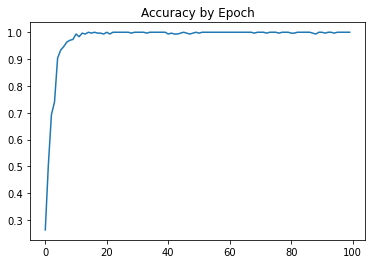

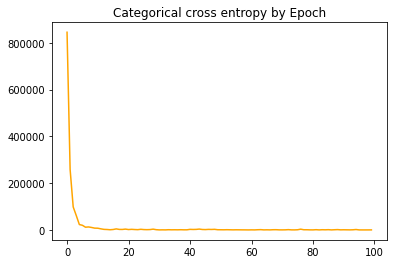

In [133]:
plt.plot(simple_CNN_training.history['accuracy'])
plt.title('Accuracy by Epoch')
plt.show()
plt.plot(simple_CNN_training.history['loss'], color = 'orange')
plt.title('Categorical cross entropy by Epoch')
plt.show()

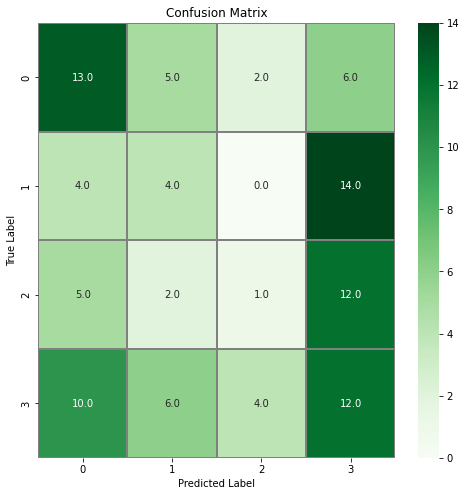

In [134]:
confusion_mtx = confusion_matrix(y_test, CNN_simple_pred[:, None]) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

## SVM

In [135]:
x_train, x_test, y_train, y_test = train_test_split(speaking_processed, targets)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(300, 7168) (300,) (100, 7168) (100,)


In [136]:
onehot_encoder = OneHotEncoder(sparse=False)
y_train = onehot_encoder.fit_transform(y_train[:, None])
y_train_IE = np.argmax(y_train, axis = 1)
y_test = np.argmax(onehot_encoder.transform(y_test[:, None]), axis = 1)
print(x_train.shape, x_test.shape, y_train.shape, y_train_IE.shape, y_test.shape)

(300, 7168) (100, 7168) (300, 4) (300,) (100,)


In [137]:
clf = svm.SVC(kernel='rbf') #RBF = 29% best so far

clf.fit(x_train, y_train_IE)

y_pred = clf.predict(x_test)

In [138]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.4


In [139]:
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

[[10  4  2  5]
 [ 5 15  1  3]
 [11  6  3 10]
 [11  2  0 12]]
              precision    recall  f1-score   support

           0       0.27      0.48      0.34        21
           1       0.56      0.62      0.59        24
           2       0.50      0.10      0.17        30
           3       0.40      0.48      0.44        25

    accuracy                           0.40       100
   macro avg       0.43      0.42      0.38       100
weighted avg       0.44      0.40      0.37       100



## Random Forest

In [50]:
x_train, x_test, y_train, y_test = train_test_split(speaking_processed, targets)
print(x_train.shape, y_train.shape, x_test.shape, y_test.shape)

(975, 7168) (975,) (325, 7168) (325,)


In [51]:
onehot_encoder = OneHotEncoder(sparse=False)
y_train = onehot_encoder.fit_transform(y_train[:, None])
y_train_IE = np.argmax(y_train, axis = 1)
y_test = np.argmax(onehot_encoder.transform(y_test[:, None]), axis = 1)
print(x_train.shape, x_test.shape, y_train.shape, y_train_IE.shape, y_test.shape)

(975, 7168) (325, 7168) (975, 5) (975,) (325,)
